# TIME SERIES FORECASTING - CHAMPAGNE SALES

I will be using time series forcasting technique to forecat champagne sales. The sales data of champagnes of a company names 'Perrin Freres'. 
Find the data here: https://datamarket.com/data/set/22r5/perrin-freres-monthly-champagne-sales-millions-64-72#!ds=22r5&display=line

Procedure I have followed:
1. Import the dataset
2. Explore and understanding the dataset
3. Building train and test set
4. Decomposing the time-series
5. Check if time-series is stationary 
    a. Summary statistics
    b. Dickey Fuller test
6. Making the time-series stationary by removing seasonality
7. Validating the model with test set
    a. building ARIMA model
    b. building SARIMA model
    
As I proceed, I will list out the intiutions I have had throughout the project progresses. 

In [1]:
# Import all the neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
from numpy import log

## 1. Loading the champagne sales data

In [2]:
df = pd.read_excel('champagne.xlsx', skiprows=12, names = ['Month', 'Sales'], parse_cols = 1)

## 2. Explore and understanding the dataset

In [3]:
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [4]:
df.tail()

,Month,Sales
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413
104,1972-09-01,5877


In [5]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


To convert the data frame into a time series I take the 'Month' column and convert it into the index of the series.

In [6]:
df.index = pd.to_datetime(df['Month'],format='%y-%m')
df.head()

,Month,Sales
Month,,
1964-01-01,1964-01-01,2815
1964-02-01,1964-02-01,2672
1964-03-01,1964-03-01,2755
1964-04-01,1964-04-01,2721
1964-05-01,1964-05-01,2946


## 3. Buliding train and test sets

Taking the values of all the years except 1972 as the train data and the values in the year 1972(9 months) as the test data

In [11]:
train = df[df.index.year != 1972]['Sales']
test = df[df.index.year == 1972]['Sales']

In [12]:
train.shape[0]

96

In [13]:
test.shape[0]

9

In [14]:
train.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01', '1967-07-01', '1967-08-01',
               '1967-09-01', '1967-10-01', '1967-11-01', '1967-12-01',
               '1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
      

## 4. Decomposing the time-series

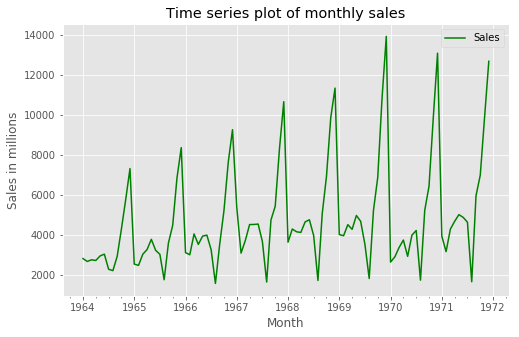

In [16]:
# Plotting the time-series and ckhecking its distributions

train.plot(figsize=(8,5), color = 'green')
plt.xlabel('Month')
plt.ylabel('Sales in millions')
plt.title('Time series plot of monthly sales')
plt.legend()
plt.show()

Intuition : We see that there is an seasonality in the data, the peaks are repeating themselves and are getting higher each year

In [17]:
# Decompose the timeseries into 4 components

decomposition = sm.tsa.seasonal_decompose(train, model='additive')

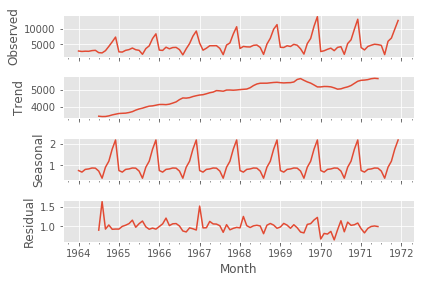

In [18]:
fig = decomposition.plot()

To undertand trends - Read : https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

We need to now make sure that the time series is stationary. Meaning statistical properties of time series such as mean, variance, autocorrelation etc must all be costant over time. 
For more information read: https://people.duke.edu/~rnau/411diff.htm


Advantages of stationary time-series:
    1. It is relatively easier to predict. when we have statistical properties, we can predict the series which will have the same properties in the future
    2. It is an important part of fitting an ARIMA model
    

## 5. Checking if time-series is stationary

Ways of checking if the series is stationary
1. Summary Statistics: check summary stats for your data for seasons or random partitions and check for obvious or significant difference
2. Statistical tests: Use statistical tests to cj=keck if the expectations of stationarity are met or violated

## 5a. Summary Statistics

In [19]:
X = train.values

In [20]:
split = int(len(X)/2)
print(split)

48


In [21]:
X1, X2 = X[0:split], X[split:]

In [22]:
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4174.000000, mean2=5432.791667
variance1=4040007.791667, variance2=8986788.248264


We see that the mean and variance look very different. hence we have a non-stationary time series

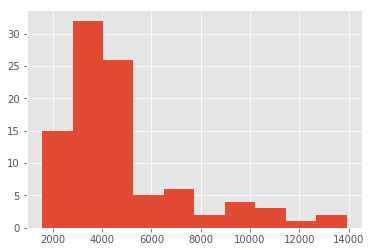

In [23]:
#Check to see if distribution of values are asssuming a gaussian curve

#Plotting values of time series as histogram 
train.hist()

We see that there is an distribution of values does not look like a gausian, therefore mean and variance are less meaningful. 

Reviewing the time-series again, we find that there is an obvious seasonality component which is growing. This suggests that the there is an exponential growth from season to season. 

We can use log transformation to flatten out exponential change back to linear relationship

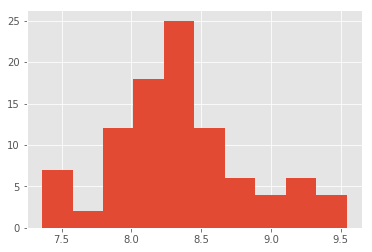

In [24]:
transform = train.values
transform = log(X)
plt.hist(transform)
plt.show()

In [25]:
# Now we calculate the mean and variance once again
X = train.values
X = log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=8.238328, mean2=8.467969
variance1=0.186876, variance2=0.258436


This shows that mean and variance for each hroup are similar but not identical. 
This makes it seem that time series is stationary but we strongly believe that this is not the case after reviewing the time-series plot itself

Hence we can use a statistical test to check the difference between two samples of Gaussian random variable is real or statistical fluke.


## 5b. Augumented Dickey-Fuller test

It is a type of unit root test
Intuition: It determines how strongly a time series is defined by a trend.
It uses an autoregressive model and optimizes and information criterian across multiple differnt lag values. 

H0 - The null hypothesis of the test is that time series can be represented by a unit root, what is not stationary. If H0 fails to be rejected, it means time series has a unit root, meaning it is non-stationary. It has some time dependent structure. 
H1 - The H0 is rejected, suggesting time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure. 

This is dependent on p-value. 
p-value > 0.05 - Fail to reject the null hypothesis, data has a unit root and is non-stationary
p-value <= 0.05 - Reject null hypothesis, data does not have a unit root and is stationary. 


In [26]:
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(data):
    X = data.values
    result = adfuller(X, autolag = 'AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        


In [27]:
# Plot for rolling mean and rolling standard deviation 

def rolling_plot(data, window, title = ''):
    rolling_mean = data.rolling(window = 12).mean()
    rolling_var = data.rolling(window = 12).std()
    plt.figure(figsize = (10, 7))
    data.plot()
    rolling_mean.plot(label = 'rolling mean')
    rolling_var.plot(label = 'rolling std')
    plt.ylabel('Sales in millions')
    plt.title(title)
    plt.legend()
    plt.show()
    

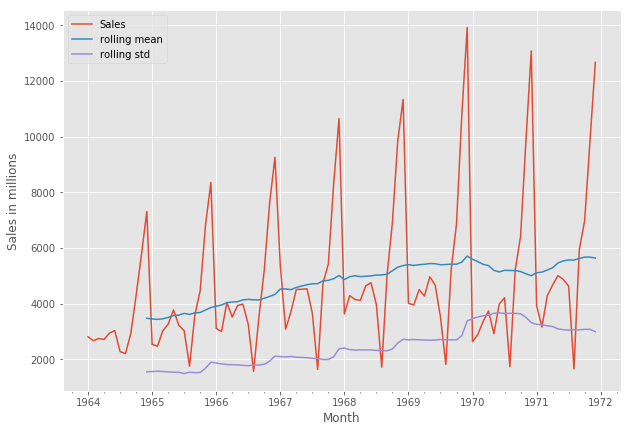

In [30]:
rolling_plot(train, 12)

In [28]:
dickey_fuller(train)

ADF Statistic: -1.620557
p-value: 0.472437
Critical Values:
	1%: -3.511
	5%: -2.897
	10%: -2.585


Intuition : the test statistics give a value of -1.62. This means that we are less likely to reject the null hypothesis as we have a non-stationary data. 

## 6. Making the time-series stationary by removing seasonality

Since the series has seasonality which is quite clearly visible, we can remove the seasonality by shifting the series by 12 and subtracting it from the orignal series.

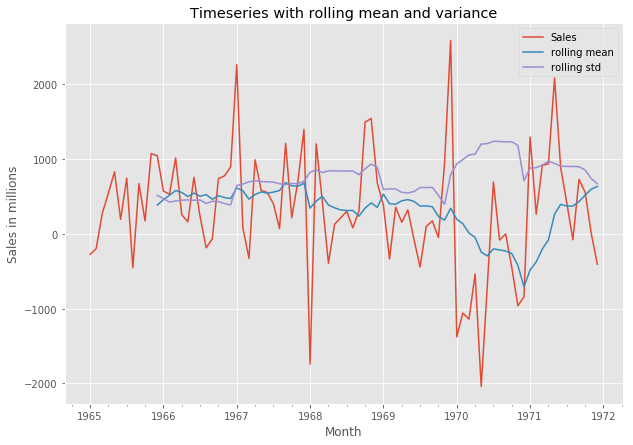

In [33]:
seasonal_data = train - train.shift(12)
seasonal_data.dropna(inplace = True)

rolling_plot(seasonal_data, 12, 'Timeseries with rolling mean and variance')


Now we have removed the seasonality from the time series. Again we perform the dickey fullet tesr and check if time series is stationary.

In [32]:
dickey_fuller(seasonal_data)

ADF Statistic: -7.218206
p-value: 0.000000
Critical Values:
	1%: -3.512
	5%: -2.897
	10%: -2.586


We now see that the time series is stationary as the test statistics is much less than 1 % critical value. This just means that that we are more than 99% confidant that the time seirs us stationary. 

We now have removed stationarity from our time series, we can make the Auto-correlation function and Partial ACF plot which helps us decide the parameters for the Arima model

In [34]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [35]:
data_acf = acf(seasonal_data, nlags=40)
dat_pacf = pacf(seasonal_data, nlags = 40)

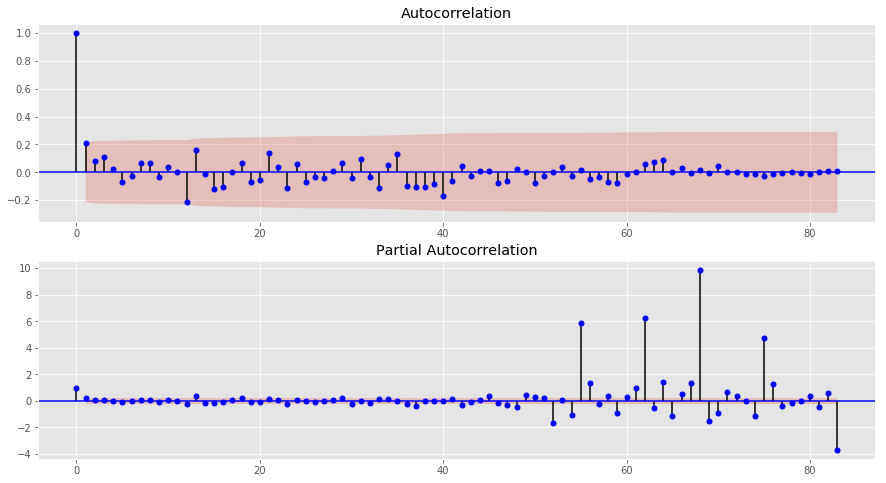

In [36]:
plt.figure(figsize = (15,8))
plt.subplot(211)
plot_acf(seasonal_data, ax=plt.gca(), color ='blue')
plt.subplot(212)
plot_pacf(seasonal_data, ax=plt.gca(),  color ='blue')
plt.show()

Intiutions:
1. Few significant values in Autocorrelation and Partical Autocorrelations. 
2. Both PACF and ACF drop suddenly (maybe there is a mix of AR and MA models)


As the model will predict values of non-seasonal data, we need to add the seasonal component we subtracted to get the correct/true predictions. 

In [38]:
# Invesrses the seasonal difference of the series
def inverse_seas_diff(original, value, interval):
    return value + original.iloc[-interval]

# Takes the seasonal difference for a series to removethe seasonality
def make_seas_diff(original, interval):
    seasonal_diff_ts = original - original.shift(interval)
    seasonal_diff_ts.dropna(inplace  =True)
    return list(seasonal_diff_ts)

## 7. Validating the model with test set 

## 7a. Building ARIMA model

In [39]:
#Import the required class
from statsmodels.tsa.arima_model import ARIMA

In [44]:
# We use feed-forward validation. I will build a model by iterating over every value in the test set. 

In [59]:
def feed_forward(order):
    
    train_list = list(train)
    predictions = []
    # Iterate over each value in test set
    for index,true_value in test.iteritems(): 
        # removing seasonality in train set
        seasonal_data = make_seas_diff(pd.Series(train_list),12)
        # building a model using non-stationary data
        model = ARIMA(seasonal_data, order=order)
        results_AR = model.fit(trend = 'nc',disp=0)
        # forecast the next value to the train set
        pred = results_AR.forecast()[0][0]
        pred = inverse_seas_diff(pd.Series(train_list),pred,12)
        # Add the true value to the train set
        train_list.append(true_value)
        # Add predicted value to the prediction list
        predictions.append(pred)

    return ('RMSE: ', mean_squared_error(list(test), predictions) ** 0.5)

In [60]:
import itertools
p = range(0,5)
d = range(0,3)
q = range(0,5)
combinations = list(itertools.product(p,d,q))

for parameter in combinations:
    try:
        order = parameter
        print(order,':', feed_forward(order))
    except:
        continue

(0, 1, 1) : ('RMSE: ', 350.79741687131593)
(0, 1, 2) : ('RMSE: ', 360.37146714168034)
(0, 2, 1) : ('RMSE: ', 504.4349189750739)
(1, 1, 0) : ('RMSE: ', 421.2562230886921)
(1, 1, 1) : ('RMSE: ', 363.4806671934062)
(1, 1, 2) : ('RMSE: ', 366.1887098736224)
(1, 1, 3) : ('RMSE: ', 364.9832833512474)
(1, 2, 0) : ('RMSE: ', 711.9525275215562)
(2, 1, 0) : ('RMSE: ', 370.7775212450302)
(2, 1, 1) : ('RMSE: ', 372.1811886675026)
(2, 1, 3) : ('RMSE: ', 331.6876181099818)
(2, 2, 0) : ('RMSE: ', 614.0127178360414)
(2, 2, 1) : ('RMSE: ', 372.0512845440269)
(3, 1, 0) : ('RMSE: ', 348.1395504605333)
(3, 1, 1) : ('RMSE: ', 364.9524596160319)
(3, 1, 2) : ('RMSE: ', 365.2244407004579)
(3, 2, 0) : ('RMSE: ', 534.5556899647158)
(3, 2, 1) : ('RMSE: ', 350.25288969470085)
(4, 1, 0) : ('RMSE: ', 337.36322836447454)
(4, 1, 1) : ('RMSE: ', 366.205699466773)
(4, 1, 2) : ('RMSE: ', 343.9971636063933)
(4, 1, 3) : ('RMSE: ', 507.06052624058464)
(4, 2, 0) : ('RMSE: ', 451.7164670802182)
(4, 2, 1) : ('RMSE: ', 340.714

We choose from various models. If there are no MA or q terms the RMSE becomes high. 
We will build a model with p=4, d=2, q=1

RMSE:  340.71429708522015


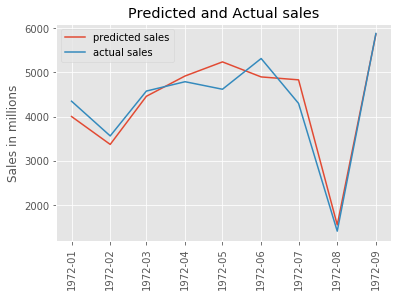

In [65]:
train_list = list(train)
predictions = []
for index,true_value in test.iteritems(): 
    seasonal_data = make_seas_diff(pd.Series(train_list),12)
    model = ARIMA(seasonal_data, order= (4,2,1))
    results_AR = model.fit(trend = 'nc',disp=0)
    pred = results_AR.forecast()[0][0]
    pred = inverse_seas_diff(pd.Series(train_list),pred,12)
    train_list.append(true_value)
    predictions.append(pred)

print ('RMSE: ', mean_squared_error(list(test), predictions) ** 0.5)

pred_series =  pd.Series(predictions, index = test.index)
plt.plot(pred_series, label = 'predicted sales')
plt.plot(test, label = 'actual sales')
plt.xticks(rotation = 'vertical')
plt.ylabel('Sales in millions')
plt.title('Predicted and Actual sales')
plt.legend()

We have now plotted the actual and predicted values for the last 9 months in test set.
Intuition:  We can see that the predicted sales match the actual sales in the last 9 months very well
    

## 7b. Building SARIMA model 

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

We specify additional parameters - p,d,q,m for modelling seasonality along with the genral parameters (p,d,q) and m meaning number f periods for which seasonality exists. 
Here we do not need to remove the seasonality. 
Chooding the order for p,d,q as 0,1,1 and m=12

RMSE:  328.881464569704


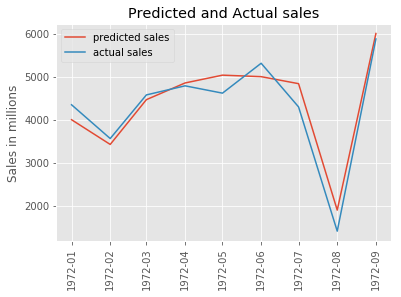

In [71]:
train_list = list(train)
predictions = []
for index,true_value in test.iteritems(): 
    model = SARIMAX(train_list, trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
    results_AR = model.fit(trend = 'nc',disp=0)
    pred = results_AR.forecast()[0]
    train_list.append(true_value)
    predictions.append(pred)

print ('RMSE: ', mean_squared_error(list(test), predictions) ** 0.5)

pred_series =  pd.Series(predictions, index = test.index)
plt.plot(pred_series, label = 'predicted sales')
plt.plot(test, label = 'actual sales')
plt.xticks(rotation = 'vertical')
plt.ylabel('Sales in millions')
plt.title('Predicted and Actual sales')
plt.legend()